# 改定監護人與輔助人之重要因素
## 以實證研究探求民法第1106條之1內涵

> 李育誠、宋怡婷、鍾育雯、顏敬柏（按筆畫排序）


# 一、研究背景
## （一）研究動機

家事事件法第164條第1項第3款之「改定監護人事件」，係依據[民法第1106條之1](https://law.moj.gov.tw/LawClass/LawSingle.aspx?pcode=B0000001&flno=1106-1)第1項「有事實足認監護人不符受監護人之最佳利益，或有顯不適任之情事者」為法院得改定之標準。然此屬不確定法律概念，在個案上如何判斷與操作，仍無定論。

故本研究蒐集地方法院之裁定，以了解地方法院改定監護／輔助人時，會考量哪些因素以決定監護／輔助人之行為是否「違反本人最佳利益」或「顯不適任」，且何種因素為影響最後改定結果之重要關鍵。

## （二）文獻回顧

# 二、研究設計

因本研究所欲研究範圍鎖定於影響法院判斷改定監護／輔助人之因素，使用「裁判家」查詢系統，檢索2012年6月1日至2021年12月31日共9年期間之第一審裁定。係考量家事事件法於2012年6月1日正式施行，為觀察該法對於實務運作之影響，且為使研究結果具普遍性，以數量較二、三審多之一審判決，又因改定監護／輔助人之案件僅有少量的上訴或抗告，上訴維持下級審裁判之比率亦高。故本研究以2012年6月1日為起點蒐集至2021年之各地方法院一審裁判作為本次研究的範圍。

檢索條件與關鍵字設定上，因若於案由檢索欄位僅以「改定監護人 OR 輔助人」之條件搜尋，將會出現大量未成年人之監護／輔助人改定案件，此非本研究想探討之案件類型。故為限縮搜尋條件，改以案由搜尋「(改定監護人 OR 改定輔助人) NOT 未成年」，並勾選一審欄位，且將裁判期間設定於2013年1月1日至2021年12月31日，初步搜尋之裁定數量為647件（檢索與下載日期2022年3月3日）。

### Codebook

In [1]:
import gspread
import pandas as pd
import numpy as np
from google.colab import auth
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

def load_df(data):
  df = pd.DataFrame(data)
  df.columns = df.loc[0, :].values.tolist()  # gsheet 預設欄位是數字 所以把第一行換成欄位/變數名
  df = df.drop([0]).reset_index()  # 去除一行多的東西 這個不一定要做 看你自己的資料 
  return df

wb = gc.open_by_key('1KRdhDveYVXtv1xy5iDvg0QlLcwQBRLw1Sz5e9zgxTaI')
sheet = wb.worksheet('codebook')
data = sheet.get_all_values()
codebook = pd.DataFrame(data)
codebook.columns = codebook.iloc[0]
codebook = codebook.iloc[1:]

left_aligned_df = codebook.head(51).style.set_properties(**{'text-align': 'left'})
display(left_aligned_df)

0,編碼名稱,編碼類型,編碼說明,編碼數值（0包含未提及）
1,,聲請原因,監護/輔助人年事已高,1=是，0=否
2,,,監護/輔助人身體狀況不堪負荷,1=是，0=否
3,,,監護/輔助人不當管理本人財產,1=是，0=否
4,,,監護/輔助人與本人有利害關係,1=是，0=否
5,,,監護/輔助人有其他非財產之不當行為,1=是，0=否
6,,,監護/輔助人是否為本人之實際照顧者,1=是，0=否
7,,,監護/輔助人是否有續任意願,1=是，0=否
8,,,其他,1=是，0=否
9,,,監護/輔助人因工作繁忙或在國外無法執行相關事務,1=是，0=否
10,,,,


# 三、研究資料前處理與資料描述

## 1. 資料前處理

#### 確認資料樣式，以及編碼狀態
#### 目標：沒有缺值、有標記欄位格式統一

In [ ]:
wb = gc.open_by_key('1TMDwDBPH4UWz0LiMV9PUSOVQtasLYykNMkhWJrxQcq0')

In [ ]:
sheet = wb.worksheet('自然人')
data = sheet.get_all_values()
df = load_df(data)

for col in ['主管機關是否被法院改定 (1=是, 2=否)', '原監護輔助人是否被法院改定']:
  df[col] = df[col].apply(lambda x: 0 if x == '2' else x)

for col in ['監護輔助人是本人之「實際照顧者」', '法院是否認為原監護輔助人「年事已高」', '法院是否考慮原監護輔助人之身體狀況', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」']:
  df[col] = df[col].apply(lambda x: '' if x == '0' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '2' else x)

for col in ['原監護輔助人是否有意願續任']:
  df[col] = df[col].apply(lambda x: '' if x == '0' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '1' else x)
  df[col] = df[col].apply(lambda x: 1 if x == '2' else x)
  df[col] = df[col].apply(lambda x: 1 if x == '3' else x)

for col in ['專業人士訪視報告之「改定建議」']:
  df[col] = df[col].apply(lambda x: '' if x == '0' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '1' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '2' else x)
  df[col] = df[col].apply(lambda x: 1 if x == '3' else x)

for col in ['其他親屬、關係人之「改定建議」']:
  df[col] = df[col].apply(lambda x: '' if x == '0' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '1' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '2' else x)
  df[col] = df[col].apply(lambda x: 0 if x == '3' else x)
  df[col] = df[col].apply(lambda x: 1 if x == '4' else x)

df = df.drop([
  '欲改定人(maybe聲請人or關係人)是否有意願擔任',
  '欲改定人(maybe聲請人or關係人)是否為本人親屬(四親等)',
  '欲改定人是否現為本人廣義照顧者', '法院是否認為須變更本人現有生活狀態',
  '法院認為原共同監護/輔助模式不利本人'
], axis=1).reset_index(drop=True)

# 寫回 Google Sheet
sheet = wb.worksheet('自然人-Binary')
sheet.update([df.columns.values.tolist()] + df.values.tolist())

{'spreadsheetId': '1TMDwDBPH4UWz0LiMV9PUSOVQtasLYykNMkhWJrxQcq0',
 'updatedCells': 9240,
 'updatedColumns': 30,
 'updatedRange': "'自然人-Binary'!A1:AD308",
 'updatedRows': 308}

In [ ]:
df.columns

Index(['index', 'UUID', '聲因1', '聲因2', '聲因3', '聲因4', '聲因5', '聲因6', '聲因7', '聲因8',
       '聲因9', '宣告性質', '原監護輔助人之類型', '原監護輔助人之人數（自然人）', '主管機關是否被法院改定 (1=是, 2=否)',
       '法院是否於聲請原因外考量「其他改定因素」', '法院是否認為原監護輔助人「年事已高」', '法院是否考慮原監護輔助人之身體狀況',
       '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」',
       '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」',
       '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」',
       '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」',
       '原監護輔助人是否被法院改定'],
      dtype='object')

## 2. 定義資料分析基礎 Class
#### 檢查一下編碼狀態 info(), value_counts()

In [2]:
gsheet_id = '1TMDwDBPH4UWz0LiMV9PUSOVQtasLYykNMkhWJrxQcq0'
gsheet_all = '自然人-Binary'
gsheet_super = '自然人-Binary-1監護宣告'
gsheet_assist = '自然人-Binary-2輔助宣告'

In [3]:
import gspread
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
from google.auth import default
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
from sklearn.decomposition import PCA


class Analysis():

  def __init__(self, sheet_id, sheet_name, auto_proc=True, to_drop=[]):
    auth.authenticate_user()
    creds, _ = default()
    gc = gspread.authorize(creds)
    self.wb = gc.open_by_key(sheet_id)
    sheet = self.wb.worksheet(sheet_name)
    self.data = sheet.get_all_values()
    self.df = self.load_df(self.data)
    self.df_full = None
    self.set_zh_font()
    if auto_proc:
      self.drop(to_drop)
      
  def load_df(self, data):
    df = pd.DataFrame(data)
    df.columns = df.loc[0, :].values.tolist()  # gsheet 預設欄位是數字 所以把第一行換成欄位/變數名
    df = df.drop([0]).reset_index(drop=True)  # 去除一行多的東西 這個不一定要做 看你自己的資料
    print(f"載入資料筆數：{len(df)}")
    return df

  def write_back_to_sheet(self, sheet_name):
    sheet = self.wb.worksheet(sheet_name)
    sheet.update([self.df.columns.values.tolist()] + self.df.values.tolist())

  def info(self):
    self.df.info()

  def describe(self):
    self.df.describe()

  def cols(self):
    return self.df.columns.to_list()

  def print_cols(self):
    for i, c in enumerate(self.cols()):
      print(i, c)

  def col(self, idx):
    col = self.cols()[idx]
    print(idx, col)
    return col

  def drop(self, columns_array):
    self.df_full = self.df.copy(deep=True)
    self.df = self.df.drop(columns_array, axis=1)

  def replace_col_to(self, col, target, to):
    self.df[col] = self.df[col].apply(
      lambda x: to if x == target else x)

  def replace_col_to_NaN(self, col, target):
    self.df[col] = self.df[col].apply(
      lambda x: np.nan if x == target else x)
  
  def replace_col_to_zero(self, col, target):
    self.df[col] = self.df[col].apply(
      lambda x: 0 if x == target else x)

  def replace_all_col_to_NaN(self, target):
    for col in self.df.columns:
      self.replace_col_to_NaN(col, target)

  def binary_converter(self, col):
    # convert 1/2 binary to 1/0
    # 1 = Yes
    # 2 = No (should be 0)
    self.df[col] = self.df[col].apply(lambda x: 0 if x == 2 else x)

  def print_value_counts(self):
    print(len(self.df.columns))
    print(self.df.columns)
    for i in self.df.columns:
      print(i)
      print(self.df[i].value_counts())
      print("-"*50)

  def convert_to_numeric(self):
    for i in range(0, len(self.df.columns)):
      self.df.iloc[:,i] = pd.to_numeric(
        self.df.iloc[:,i], errors='coerce')

  def print_dtypes(self):
    print(self.df.dtypes)

  def set_zh_font(self):
    #fm.fontManager.ttflist += fm.createFontList(['regular.ttf'])
    fm.fontManager.addfont('regular.ttf')
    matplotlib.rc('font', family='Noto Sans TC')

  def banner(self, a, b):
    print("-"*50)
    print(f"X 軸 = {a}")
    print(f"Y 軸 = {b}")
    print("-"*50)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# 下載中文字型
![ ! -f regular.ttf ] && wget http://qinghe.com.tw/fonts/Noto%20Sans%20TC/regular.ttf

--2022-06-01 13:28:52--  http://qinghe.com.tw/fonts/Noto%20Sans%20TC/regular.ttf
Resolving qinghe.com.tw (qinghe.com.tw)... 128.199.134.179
Connecting to qinghe.com.tw (qinghe.com.tw)|128.199.134.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5641188 (5.4M)
Saving to: ‘regular.ttf’

regular.ttf         100%[===================>]   5.38M   875KB/s    in 9.8s    

2022-06-01 13:29:03 (560 KB/s) - ‘regular.ttf’ saved [5641188/5641188]



In [ ]:
a = Analysis(gsheet_id, gsheet_super, to_drop=[
  'index',
  'UUID',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '宣告性質',
  '原監護輔助人之類型'
])
a.info()

載入資料筆數：208
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   聲因1                       208 non-null    object
 1   聲因2                       208 non-null    object
 2   聲因3                       208 non-null    object
 3   聲因4                       208 non-null    object
 4   聲因5                       208 non-null    object
 5   聲因6                       208 non-null    object
 6   聲因7                       208 non-null    object
 7   聲因8                       208 non-null    object
 8   聲因9                       208 non-null    object
 9   原監護輔助人之人數（自然人）            208 non-null    object
 10  法院是否於聲請原因外考量「其他改定因素」      208 non-null    object
 11  法院是否認為原監護輔助人「年事已高」        208 non-null    object
 12  法院是否考慮原監護輔助人之身體狀況         208 non-null    object
 13  法院是否認為原監護輔助人「身體不堪負荷」      208 non-null    object
 14  法院是否認為原監護輔助人「盜領

In [ ]:
# 空值取代為 0
for col in a.df.columns:
  a.replace_col_to(col, '', 0)

# 轉換為數字
a.convert_to_numeric()
a.print_dtypes()
a.print_value_counts()

聲因1                         int64
聲因2                         int64
聲因3                         int64
聲因4                         int64
聲因5                         int64
聲因6                         int64
聲因7                         int64
聲因8                         int64
聲因9                         int64
原監護輔助人之人數（自然人）              int64
法院是否於聲請原因外考量「其他改定因素」        int64
法院是否認為原監護輔助人「年事已高」          int64
法院是否考慮原監護輔助人之身體狀況           int64
法院是否認為原監護輔助人「身體不堪負荷」        int64
法院是否認為原監護輔助人「盜領存款」          int64
法院是否認為原監護輔助人「不當處理本人之不動產」    int64
原監護輔助人是否與本人有「利害關係」          int64
法院是否認為原監護輔助人有「其他不當行為」       int64
監護輔助人是本人之「實際照顧者」            int64
監護輔助人是否為本人「廣義照顧者」           int64
原監護輔助人是否有意願續任               int64
專業人士訪視報告之「改定建議」             int64
本人之「改定建議」                   int64
其他親屬、關係人之「改定建議」             int64
原監護輔助人是否被法院改定               int64
dtype: object
25
Index(['聲因1', '聲因2', '聲因3', '聲因4', '聲因5', '聲因6', '聲因7', '聲因8', '聲因9',
       '原監護輔助人之人數（自然人）', '法院是否於聲請原因外考量「其他改定因素」', '法院是否認為原監護輔助人「

# 四、資料分析

## 3. 敘述統計

In [ ]:
from matplotlib import cm

class Plot(Analysis):

  def bar(self, columns_x, columns_y, title, xlabel, ylabel, ylim=250, horizontal=False):
    if horizontal:
      plt.barh(columns_x, columns_y, color=cm.jet(np.linspace(0, 1, len(columns_x))))
    else:
      plt.bar(columns_x, columns_y, color=cm.jet(np.linspace(0, 1, len(columns_x))))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Add num on bar top
    for i in range(0, len(columns_x)):
      plt.text(columns_x[i], columns_y[i]+0.05, str(columns_y[i]), ha='center', va='bottom', fontsize=11)
    plt.ylim(0, ylim)
    plt.show()

  
  def pie(self, columns_x, columns_y, title):
    print('x', columns_x)
    print('y', columns_y)
    colors = ['lightblue','pink']
    plt.pie(columns_y, labels=columns_x, autopct='%1.2f%%', colors=colors)
    plt.legend()
    plt.title(title)
    plt.show()

p = Plot(gsheet_id, gsheet_all)

載入資料筆數：307


### 3.1 宣告性質

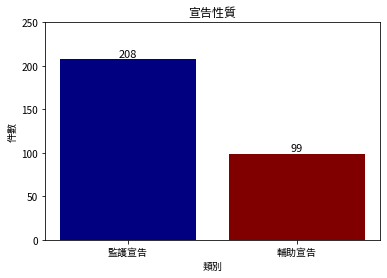

In [ ]:
p.bar(
    ['監護宣告', '輔助宣告'],
    list(p.df['宣告性質'].value_counts()),
    '宣告性質', '類別', '件數')

### 3.2 是否改定

x ['改定', '不改定']
y [199, 108]


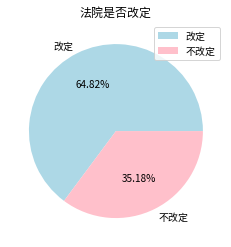

In [ ]:
p.pie(
    ['改定', '不改定'],
    list(p.df['原監護輔助人是否被法院改定'].value_counts()),
    '法院是否改定')

### 3.3 因素統計

{
  "0": "法院是否於聲請原因外考量「其他改定因素」",
  "1": "法院是否認為原監護輔助人「年事已高」",
  "2": "法院是否考慮原監護輔助人之身體狀況",
  "3": "法院是否認為原監護輔助人「身體不堪負荷」",
  "4": "法院是否認為原監護輔助人「盜領存款」",
  "5": "法院是否認為原監護輔助人「不當處理本人之不動產」",
  "6": "原監護輔助人是否與本人有「利害關係」",
  "7": "法院是否認為原監護輔助人有「其他不當行為」",
  "8": "監護輔助人是本人之「實際照顧者」",
  "9": "監護輔助人是否為本人「廣義照顧者」",
  "10": "原監護輔助人是否有意願續任",
  "11": "專業人士訪視報告之「改定建議」",
  "12": "本人之「改定建議」",
  "13": "其他親屬、關係人之「改定建議」"
}


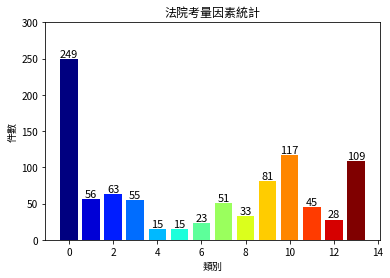

In [ ]:
import json

def calc(f, t):
  index = 0
  map = {}
  for col in p.cols()[f:t]:
    map[index] = col
    index += 1
    p.replace_col_to(col, '', 0)

  p.convert_to_numeric()

  reasons_count = []
  for col in p.cols()[f:t]:
    reasons_count.append(p.df[col].value_counts().to_dict()[1])

  print(json.dumps(map, indent=2, ensure_ascii=False))
  return map, reasons_count

count_map, count_rcount = calc(15, 29)

p.bar(
    list(count_map.keys()),
    count_rcount,
    '法院考量因素統計',
    '類別', '件數',
    ylim=300,
    horizontal=False
)

{
  "0": "聲因1",
  "1": "聲因2",
  "2": "聲因3",
  "3": "聲因4",
  "4": "聲因5",
  "5": "聲因6",
  "6": "聲因7",
  "7": "聲因8",
  "8": "聲因9"
}


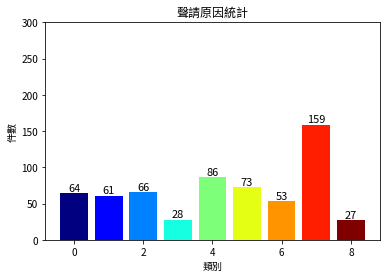

In [ ]:
ar_map, ar_rcount = calc(2, 11)

p.bar(
    list(ar_map.keys()),
    ar_rcount,
    '聲請原因統計',
    '類別', '件數',
    ylim=300,
    horizontal=False
)

### 3.4 排除

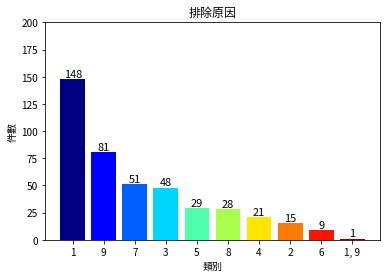


1=原監護人/輔助人死亡
2=原監護人/輔助人辭任 
3=費用未繳納
4=案件移送 
5=內容誤寫
6=本人死亡 
7=程序未補正 
8=選任程序監理人 
9=其他



In [ ]:
wb_exclude = gc.open_by_key('1Xhp7kQfweLOLmiAQpMgfVFuLnClL1kVEKuNDV5a6eTo')
sheet_exclude = wb_exclude.worksheet('不可用')
data_exclude = sheet_exclude.get_all_values()
pd_exclude = pd.DataFrame(data_exclude)
pd_exclude.columns = pd_exclude.iloc[0]
pd_exclude = pd_exclude.iloc[1:]

vc = pd_exclude['排除理由'].value_counts()
y = list(vc)
x = list(vc.keys())

p.bar(
    x,
    y,
    '排除原因',
    '類別', '件數',
    ylim=200,
)

print("""
1=原監護人/輔助人死亡
2=原監護人/輔助人辭任 
3=費用未繳納
4=案件移送 
5=內容誤寫
6=本人死亡 
7=程序未補正 
8=選任程序監理人 
9=其他
""")

## 4. 檢查共線性/相關性

In [ ]:
class Corr(Analysis):

  def corr_heatmap(self):
    """4.1"""
    ## 檢查共線性
    colormap = plt.cm.viridis
    plt.figure(figsize=(20,16))
    plt.title('all corelations', y=1.05, size=15)
    corr = self.df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
      sns.heatmap(corr, linewidths=0.1, vmax=1.0,
                  square=True, cmap="YlGnBu",
                  linecolor='white', annot=True, mask=mask)

  def chi2_contingency_and_mosaic(self, column_a, column_b):
    """4.2"""
    self.banner(column_a, column_b)
    crosstable = pd.crosstab(
        self.df[column_a],
        self.df[column_b])
    stat, p, dof, expected = stats.chi2_contingency(crosstable, correction=False)
    print(crosstable)
    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('兩者有關 Dependent (reject H0)')
    else:
        print('兩者無關 Independent (H0 holds true)')
    mosaic(self.df, [column_a, column_b])
    plt.show()

  def pca(self):
    """4.3.1"""
    # You must normalize the data before applying the fit method
    df_normalized=(self.df - self.df.mean()) / self.df.std()
    pca = PCA(n_components=self.df.shape[1])
    pca.fit(df_normalized)

    # Reformat and view results
    loadings = pd.DataFrame(
        pca.components_.T,
      columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
      index=self.df.columns)
    print(loadings)

    plt.plot(pca.explained_variance_ratio_)
    plt.ylabel('Explained Variance')
    plt.xlabel('Components')
    plt.show()

  def pca2(self, column_b, column_a):
    """4.3.2"""
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(self.df)
    principalDf = pd.DataFrame(data=principalComponents, columns=[column_a, column_b])
    finalDf = principalDf
    print(finalDf.head())

    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(1,1,1)
    sns.scatterplot(x=column_a, y=column_b, data=finalDf)
    plt.show()

### 4.1 所有相關/共線性


**分析目的**


本文將依變項和12個自變項作相關性分析，初步分析哪些自變項和依變項有高度相關性。另外由於監護人的法定職務範圍與輔助人不同，前者對被監護人負有生活照料、財產管理義務 (民法1112條)，後者則原則上只有對被輔助人特定法律行為的同意權 (民法15-2條)，故以下分析皆將監護人、輔助人分開，以免研究結果相互影響，亦藉此分析法院在考量監護人、輔助人之改定時，是否因兩者法定職務範圍的不同，進而著重考量不同因素。

#### 4.1.1 監護宣告

**分析結果：改定監護人案件**

從下圖可知，法院在決定是否改定監護人時，主要考量三大因素：「監護人是否有續任意願」、「監護人是否是本人的廣義照顧者」、「其他親屬是否一致建議法院改定」，前兩項若是，法院偏向不改定；後一項若是，法院偏向改定。

**自變項間相關性達｜0.5｜以上者**

年事已高 vs 身體不堪負荷 (0.5)

廣義照顧者 vs 實際照顧者 (0.57)


廣義照顧者 vs 續任意願 (0.62)


**自變項與依變項間相關性達｜0.5｜以上**

是否被改定 vs 廣義照顧者 (-0.6)

是否被改定 vs 續任意願 (-0.78)

是否被改定 vs 其他親屬意見 (0.49)


載入資料筆數：208


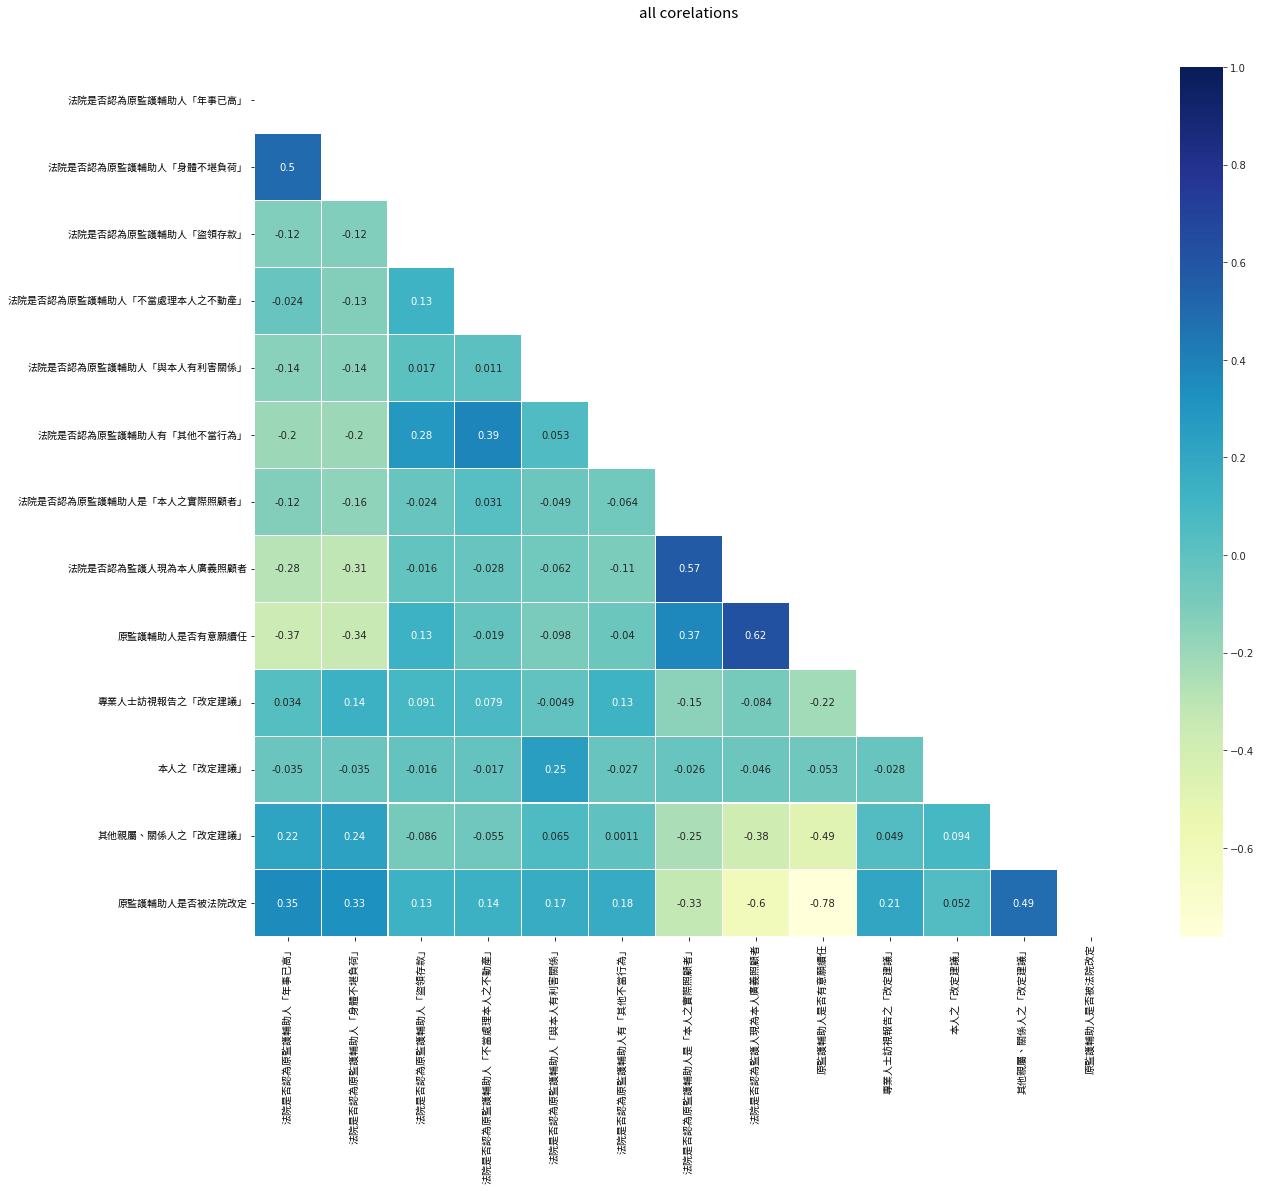

In [ ]:
c_super = Corr(gsheet_id, gsheet_super, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
])
for col in c_super.df.columns:
  c_super.replace_col_to(col, '', 0)  # 空值取代為 0
c_super.convert_to_numeric()
c_super.corr_heatmap()

#### 4.1.2 輔助宣告

載入資料筆數：99


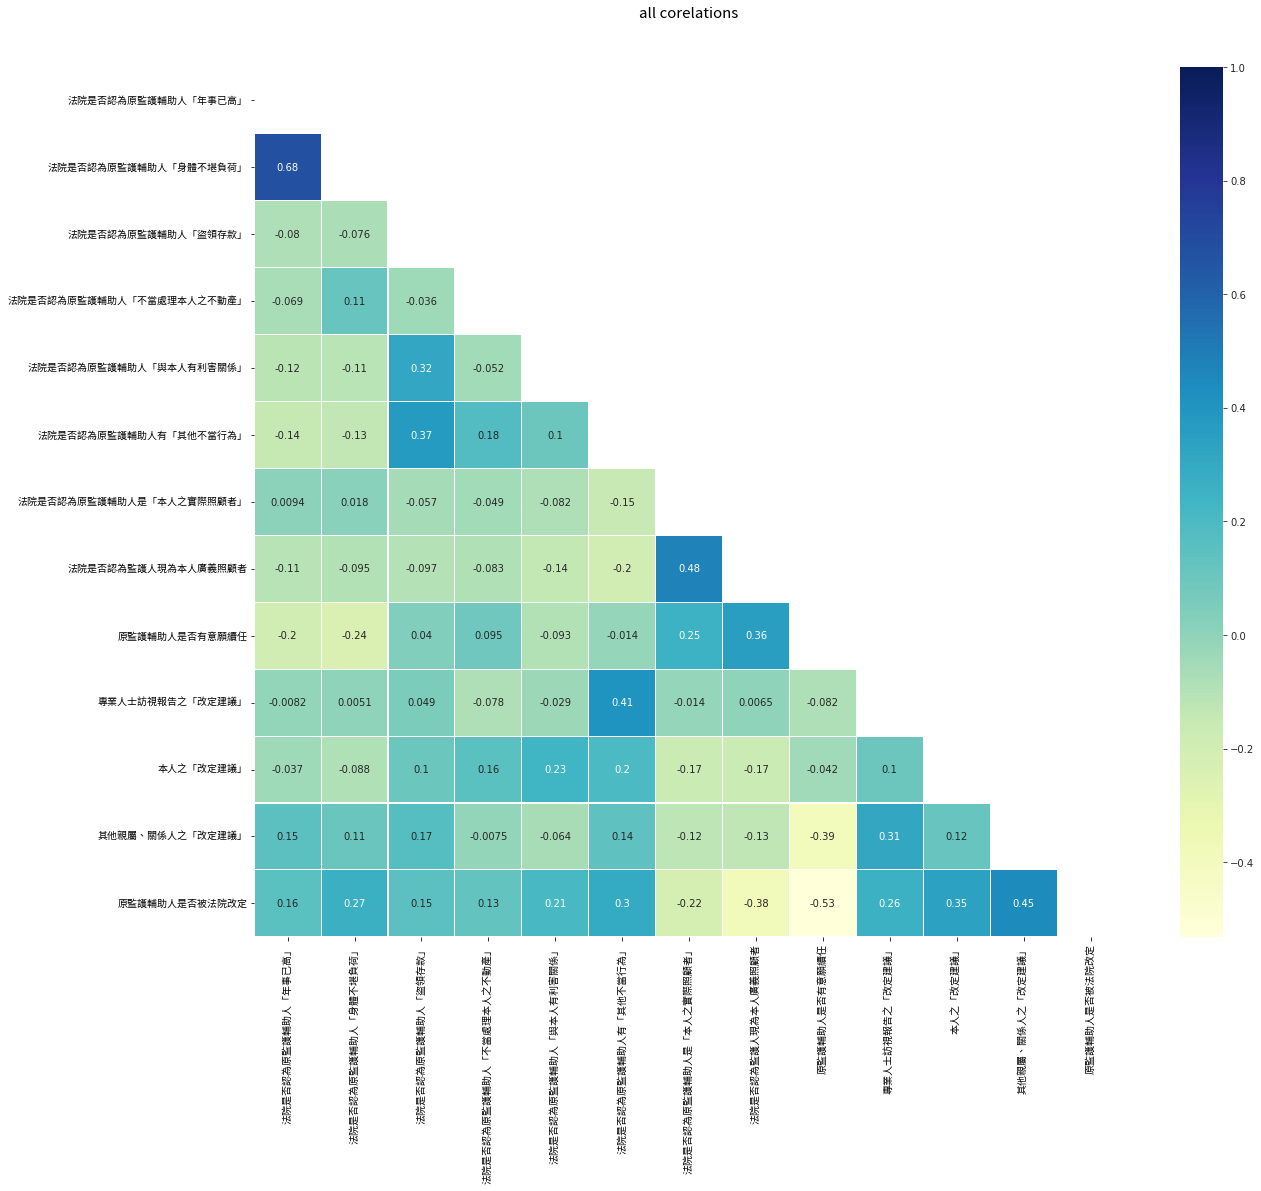

In [ ]:
c_assist = Corr(gsheet_id, gsheet_assist, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
])
for col in c_assist.df.columns:
  c_assist.replace_col_to(col, '', 0)  # 空值取代為 0
c_assist.convert_to_numeric()
c_assist.corr_heatmap()


### 4.2 兩兩相關性與馬賽克圖

#### 4.2.1 監護宣告

載入資料筆數：208



--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「年事已高」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0   1
法院是否認為原監護輔助人「年事已高」        
0                   73  92
1                    1  42
p value is 3.1604832705259343e-07
兩者有關 Dependent (reject H0)


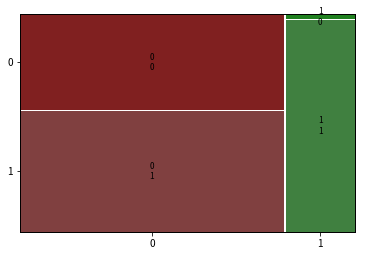




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「身體不堪負荷」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定          0   1
法院是否認為原監護輔助人「身體不堪負荷」        
0                     72  93
1                      2  41
p value is 1.9749282446220156e-06
兩者有關 Dependent (reject H0)


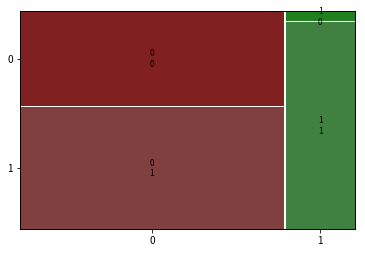




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「盜領存款」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0    1
法院是否認為原監護輔助人「盜領存款」         
0                   73  124
1                    1   10
p value is 0.059374053562222286
兩者無關 Independent (H0 holds true)


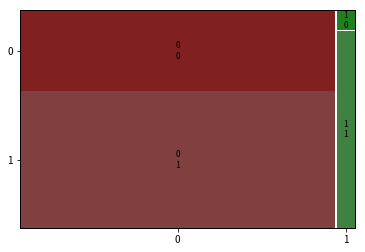




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「不當處理本人之不動產」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定              0    1
法院是否認為原監護輔助人「不當處理本人之不動產」         
0                         73  123
1                          1   11
p value is 0.0422816900286814
兩者有關 Dependent (reject H0)


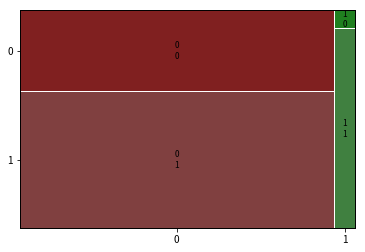




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「與本人有利害關係」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定            0    1
法院是否認為原監護輔助人「與本人有利害關係」         
0                       73  120
1                        1   14
p value is 0.015183050181613205
兩者有關 Dependent (reject H0)


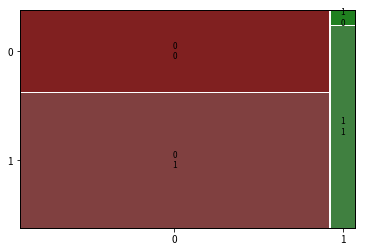




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人有「其他不當行為」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定           0    1
法院是否認為原監護輔助人有「其他不當行為」         
0                      70  110
1                       4   24
p value is 0.01141585656078672
兩者有關 Dependent (reject H0)


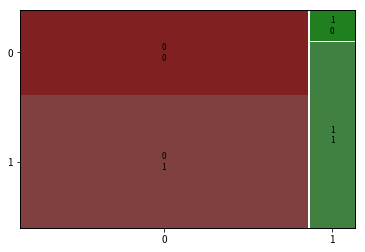




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人是「本人之實際照顧者」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定             0    1
法院是否認為原監護輔助人是「本人之實際照顧者」         
0                        54  128
1                        20    6
p value is 2.50473365744437e-06
兩者有關 Dependent (reject H0)


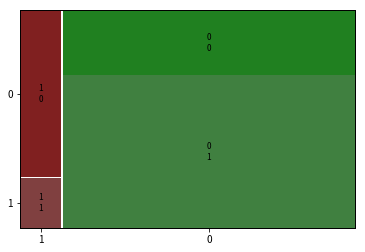




--------------------------------------------------
X 軸 = 法院是否認為監護人現為本人廣義照顧者
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0    1
法院是否認為監護人現為本人廣義照顧者         
0                   24  121
1                   50   13
p value is 3.468242725985351e-18
兩者有關 Dependent (reject H0)


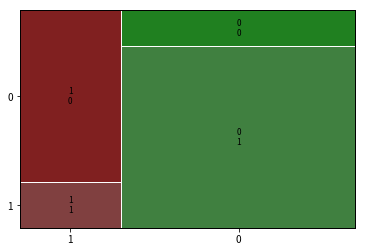




--------------------------------------------------
X 軸 = 原監護輔助人是否有意願續任
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定   0    1
原監護輔助人是否有意願續任         
0               9  122
1              65   12
p value is 1.6517895245490925e-29
兩者有關 Dependent (reject H0)


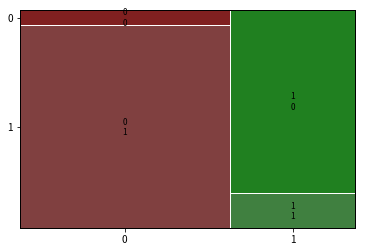




--------------------------------------------------
X 軸 = 專業人士訪視報告之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定     0    1
專業人士訪視報告之「改定建議」         
0                71  108
1                 3   26
p value is 0.0022169589588299965
兩者有關 Dependent (reject H0)


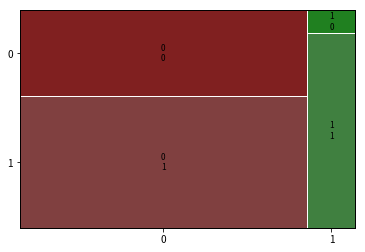




--------------------------------------------------
X 軸 = 本人之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定   0    1
本人之「改定建議」             
0              74  133
1               0    1
p value is 0.45631975102676137
兩者無關 Independent (H0 holds true)


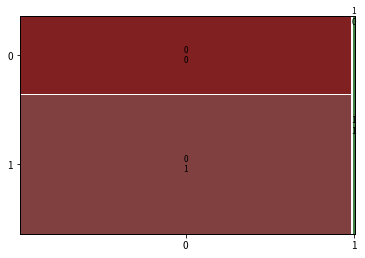




--------------------------------------------------
X 軸 = 其他親屬、關係人之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定     0   1
其他親屬、關係人之「改定建議」        
0                71  63
1                 3  71
p value is 1.7021868905916015e-12
兩者有關 Dependent (reject H0)


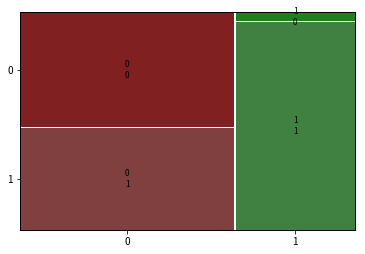

In [ ]:
m_super = Corr(gsheet_id, gsheet_super, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
])

for col in m_super.df.columns:
  m_super.replace_col_to(col, '', 0) # 替換 '' to -100 因為決策樹不支援 NaN
m_super.convert_to_numeric()

for i in range(0, 12):
  print("\n\n")
  m_super.chi2_contingency_and_mosaic(m_super.cols()[i], '原監護輔助人是否被法院改定')

#### 4.2.2 輔助宣告

載入資料筆數：99



--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「年事已高」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0   1
法院是否認為原監護輔助人「年事已高」        
0                   32  54
1                    2  11
p value is 0.12246512284065846
兩者無關 Independent (H0 holds true)


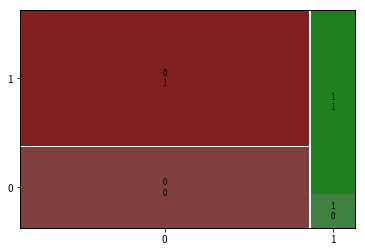




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「身體不堪負荷」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定          0   1
法院是否認為原監護輔助人「身體不堪負荷」        
0                     34  53
1                      0  12
p value is 0.007526951319670264
兩者有關 Dependent (reject H0)


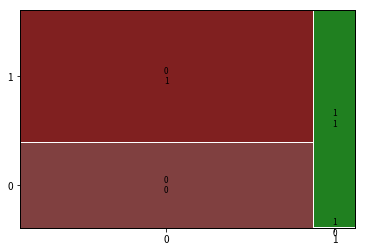




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「盜領存款」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0   1
法院是否認為原監護輔助人「盜領存款」        
0                   34  61
1                    0   4
p value is 0.13977768789706121
兩者無關 Independent (H0 holds true)


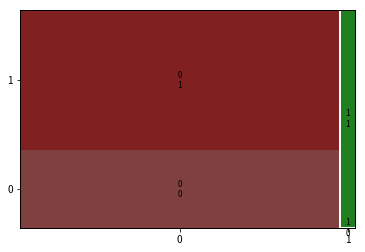




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「不當處理本人之不動產」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定              0   1
法院是否認為原監護輔助人「不當處理本人之不動產」        
0                         34  62
1                          0   3
p value is 0.20333328760444314
兩者無關 Independent (H0 holds true)


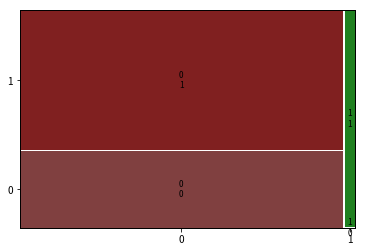




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人「與本人有利害關係」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定            0   1
法院是否認為原監護輔助人「與本人有利害關係」        
0                       34  57
1                        0   8
p value is 0.032870840234422674
兩者有關 Dependent (reject H0)


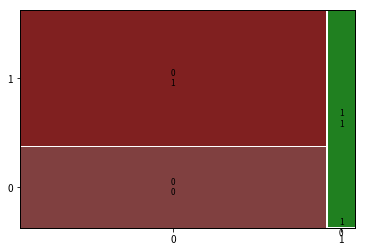




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人有「其他不當行為」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定           0   1
法院是否認為原監護輔助人有「其他不當行為」        
0                      32  44
1                       2  21
p value is 0.0031125039683490034
兩者有關 Dependent (reject H0)


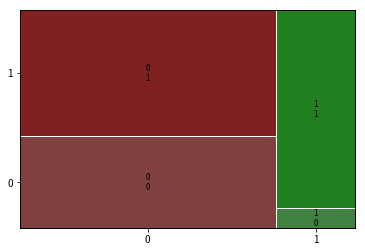




--------------------------------------------------
X 軸 = 法院是否認為原監護輔助人是「本人之實際照顧者」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定             0   1
法院是否認為原監護輔助人是「本人之實際照顧者」        
0                        29  63
1                         5   2
p value is 0.032077657775603605
兩者有關 Dependent (reject H0)


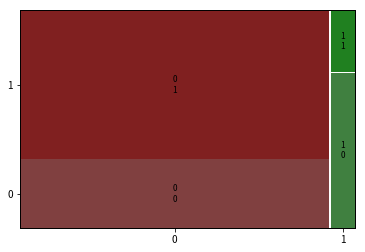




--------------------------------------------------
X 軸 = 法院是否認為監護人現為本人廣義照顧者
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定        0   1
法院是否認為監護人現為本人廣義照顧者        
0                   21  60
1                   13   5
p value is 0.00018292065104885688
兩者有關 Dependent (reject H0)


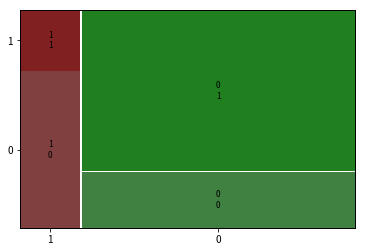




--------------------------------------------------
X 軸 = 原監護輔助人是否有意願續任
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定   0   1
原監護輔助人是否有意願續任        
0               8  51
1              26  14
p value is 1.2290030570707607e-07
兩者有關 Dependent (reject H0)


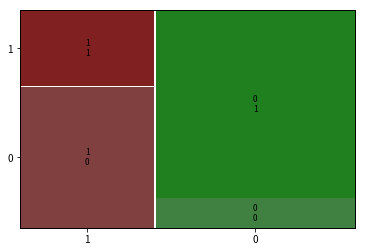




--------------------------------------------------
X 軸 = 專業人士訪視報告之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定     0   1
專業人士訪視報告之「改定建議」        
0                33  50
1                 1  15
p value is 0.009751037994224145
兩者有關 Dependent (reject H0)


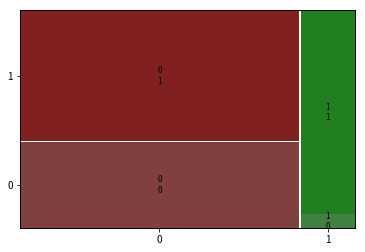




--------------------------------------------------
X 軸 = 本人之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定   0   1
本人之「改定建議」            
0              32  40
1               2  25
p value is 0.0005477360805479631
兩者有關 Dependent (reject H0)


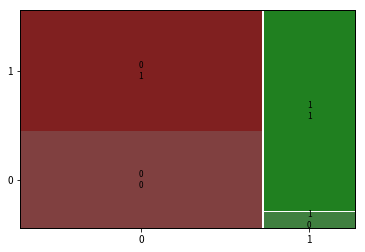




--------------------------------------------------
X 軸 = 其他親屬、關係人之「改定建議」
Y 軸 = 原監護輔助人是否被法院改定
--------------------------------------------------
原監護輔助人是否被法院改定     0   1
其他親屬、關係人之「改定建議」        
0                32  32
1                 2  33
p value is 9.156944541979785e-06
兩者有關 Dependent (reject H0)


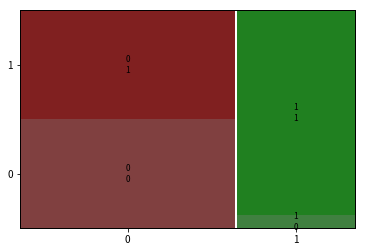

In [ ]:
m_assist = Corr(gsheet_id, gsheet_assist, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
])

for col in m_assist.df.columns:
  m_assist.replace_col_to(col, '', 0) # 替換 '' to -100 因為決策樹不支援 NaN
m_assist.convert_to_numeric()

for i in range(0, 12):
  print("\n\n")
  m_assist.chi2_contingency_and_mosaic(m_assist.cols()[i], '原監護輔助人是否被法院改定')

## 5. 決策樹


In [5]:
import graphviz
from IPython.display import display
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn import preprocessing, linear_model

class DecisionTree(Analysis):
  def load(self, columns_x, columns_y, binary_y=True, max_depth=2):
    print('x', columns_x)
    print('y', columns_y)
    self.X = self.df[columns_x]
    self.y = self.df[columns_y]

    # 切分訓練與測試資料
    train_X, test_X, train_y, test_y = train_test_split(self.X, self.y, test_size=0.2)

    if binary_y:
      lm = linear_model.LogisticRegression() # 如果是二元y
    else:
      lm = LinearRegression() # 如果是數值y

    # 建立分類器
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    self.my_clf = clf.fit(train_X, train_y)

    # 預測
    test_y_predicted = self.my_clf.predict(test_X)
    print('預測', test_y_predicted)

    # 標準答案
    print('標準答案', test_y.values)

    # 績效
    accuracy = metrics.accuracy_score(test_y, test_y_predicted)
    print('績效', accuracy)
    return accuracy
  
  def sort(self):
    return np.sort(self.y.unique()).astype(str).tolist()

  def text_representation(self):
    text_representation = tree.export_text(self.my_clf)
    print(text_representation)
  
  def graph(self):
    # DOT data
    dot_data = tree.export_graphviz(self.my_clf, out_file=None, 
                    feature_names=self.X.columns.tolist(),  
                    class_names=self.sort(),
                    filled=True)

    # Draw graph
    return graphviz.Source(dot_data) 
  
  def tree(self):
    fig = plt.figure(figsize=(16,16))
    return tree.plot_tree(self.my_clf, 
              feature_names=self.X.columns.tolist(),  
              class_names=np.sort(self.y.unique()).astype(str).tolist(),
              filled=True)

def filter_tree(query, sheet):
  p = DecisionTree(gsheet_id, sheet, auto_proc=True, to_drop=[
    'index',
    'UUID',
    '宣告性質',
    '原監護輔助人之類型',
    '原監護輔助人之人數（自然人）',
    '主管機關是否被法院改定 (1=是, 2=否)',
    '法院是否考慮原監護輔助人之身體狀況',
    '法院是否於聲請原因外考量「其他改定因素」'
  ])
  for col in p.df.columns:
    p.replace_col_to(col, '', 0) # 替換 '' to 0 因為決策樹不支援 NaN
  p.convert_to_numeric()
  p.df = p.df.query(query)
  p.df = p.df.reset_index(drop=True)
  print('-'*100)
  print(f"Filter {query} len = {len(p.df)}")
  print('-'*100)
  p.load(p.cols()[9:21], '原監護輔助人是否被法院改定', binary_y=True)
  p.text_representation()
  display(p.graph())

### 5.1 監護宣告

#### 5.1.1 法院認定的改定因素

載入資料筆數：208
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1]
標準答案 [0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1
 1 1 1 1 1]
績效 0.9285714285714286
|--- feature_8 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1
|   |--- feature_7 >  0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- featu

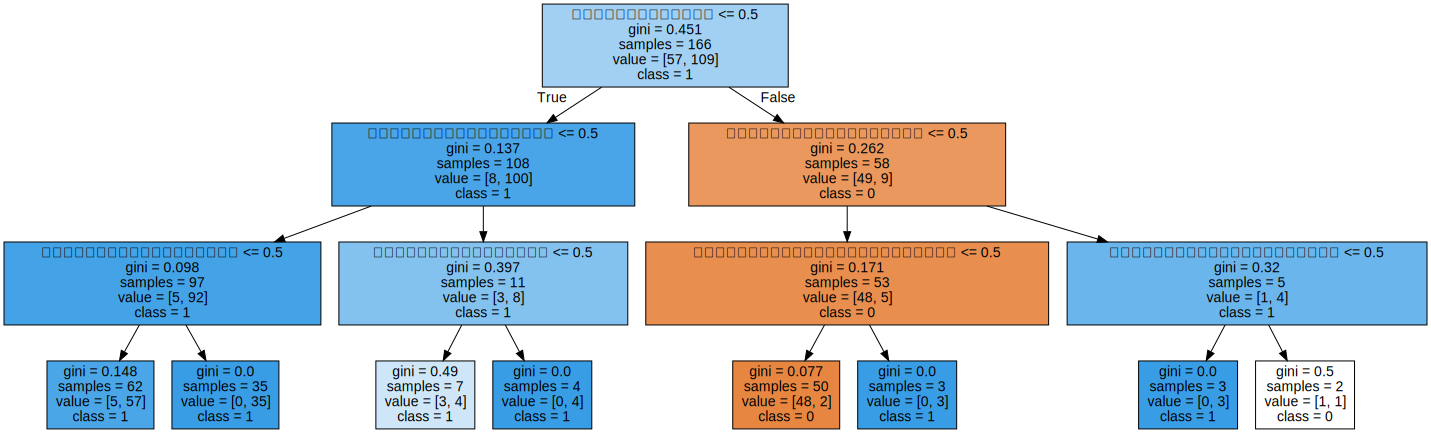

In [6]:
dt_super = DecisionTree(gsheet_id, gsheet_super, auto_proc=True, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
])
for col in dt_super.df.columns:
  dt_super.replace_col_to(col, '', 0) # 替換 '' to -100 因為決策樹不支援 NaN
dt_super.convert_to_numeric()
dt_super.load(dt_super.cols()[9:21], '原監護輔助人是否被法院改定', binary_y=True, max_depth=3)
dt_super.text_representation()
dt_super.graph()

#### 5.1.2 按聲請原因分類之法院認定的改定因素

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 1 len = 49
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 0 1 1 1 1 0 1 1]
標準答案 [1 1 0 1 1 1 1 0 1 1]
績效 1.0
|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- class: 0



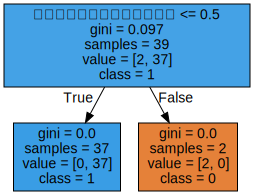

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因2 == 1 len = 44
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 1 1 1 0]
標準答案 [1 1 1 1 1 1 1 1 0]
績效 1.0
|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- class: 0



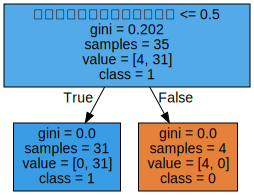

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因3 == 1 len = 45
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 0 1 0 0 0 0 0 0]
標準答案 [1 0 1 0 0 1 0 0 1]
績效 0.6666666666666666
|--- feature_3 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- class: 0



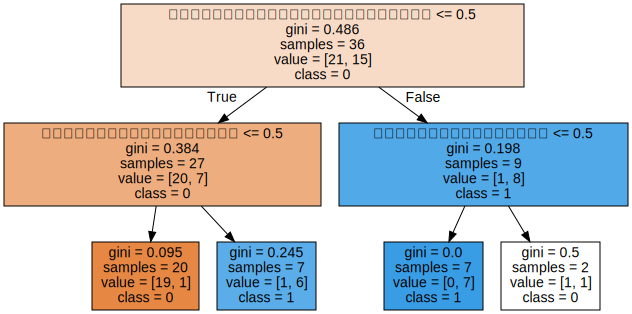

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因4 == 1 len = 16
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 0 0 1]
標準答案 [1 1 0 1]
績效 0.5
|--- feature_4 <= 0.50
|   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- class: 0



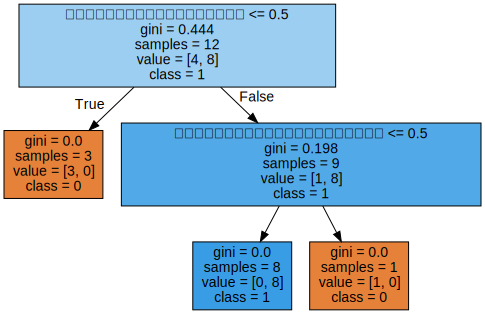

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因5 == 1 len = 64
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 0 1 0 0 0 0 0 0 0 0 1 0]
標準答案 [1 0 1 0 1 1 1 0 0 0 0 1 0]
績效 0.7692307692307693
|--- feature_5 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- class: 0



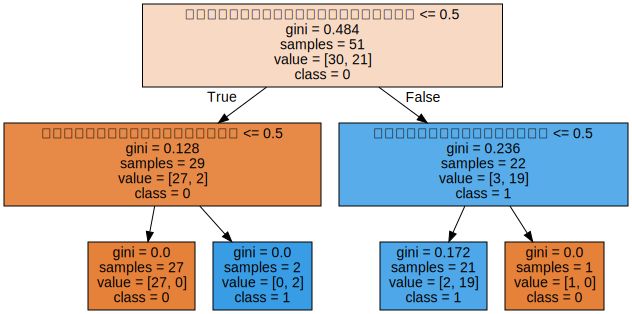

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因6 == 1 len = 45
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 0 1 0 0 1 1]
標準答案 [1 0 1 0 1 0 0 1 1]
績效 0.8888888888888888
|--- feature_8 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- class: 1
|   |--- feature_7 >  0.50
|   |   |--- class: 0
|--- feature_8 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1



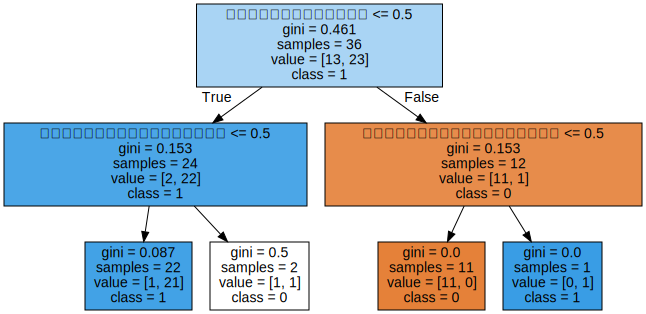

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因7 == 1 len = 37
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 1 1 1]
標準答案 [1 1 1 1 1 1 1 1]
績效 1.0
|--- feature_6 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- class: 1
|   |--- feature_11 >  0.50
|   |   |--- class: 1
|--- feature_6 >  0.50
|   |--- class: 0



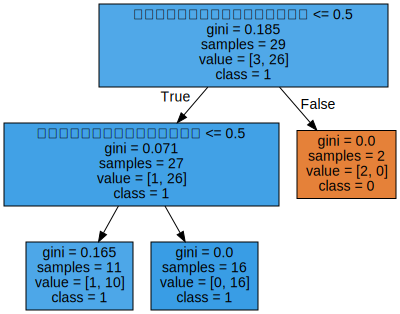

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因8 == 1 len = 105
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1]
標準答案 [1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1]
績效 1.0
|--- feature_8 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1



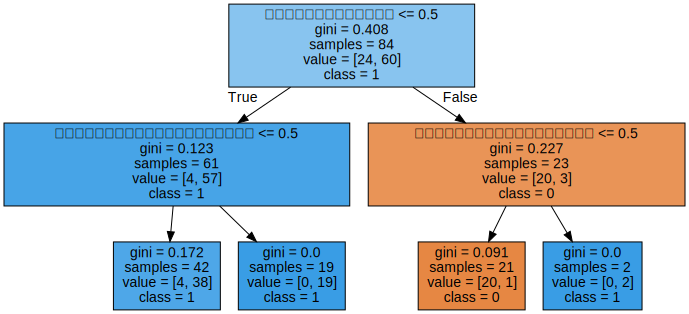

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因9 == 1 len = 14
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1]
標準答案 [1 1 1]
績效 1.0
|--- class: 0



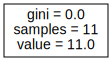

In [ ]:
for i in range(1, 10):
  filter_tree(f"聲因{str(i)} == 1", gsheet_super)

#### 5.1.3 無聲請原因

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 0 & 聲因2 == 0 & 聲因3 == 0 & 聲因4 == 0 & 聲因5 == 0 & 聲因6 == 0 & 聲因7 == 0 & 聲因8 == 0 & 聲因9 == 0 len = 22
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 0 0 0 0]
標準答案 [0 0 0 0 0]
績效 1.0
|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- class: 1



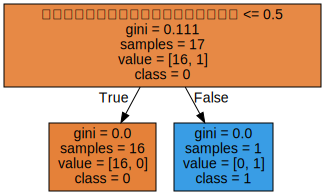

In [ ]:
filter_tree("聲因1 == 0 & 聲因2 == 0 & 聲因3 == 0 & 聲因4 == 0 & 聲因5 == 0 & 聲因6 == 0 & 聲因7 == 0 & 聲因8 == 0 & 聲因9 == 0", gsheet_super)

#### 5.1.4 聲請原因：財產相關

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因3 == 1 | 聲因4 == 1 len = 57
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 1 1 0 0 0 0 1 1 1 0 0]
標準答案 [0 0 1 0 1 1 1 1 1 1 1 0]
績效 0.5833333333333334
|--- feature_3 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 1
|   |--- feature_6 >  0.50
|   |   |--- class: 0



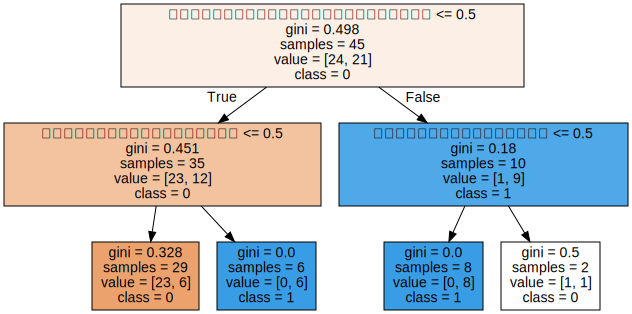

In [ ]:
filter_tree("聲因3 == 1 | 聲因4 == 1", gsheet_super)

#### 5.1.5 聲請原因：非財產相關

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因5 == 1 | 聲因6 == 1 | 聲因9 == 1 len = 100
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1]
標準答案 [1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1]
績效 0.85
|--- feature_8 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1



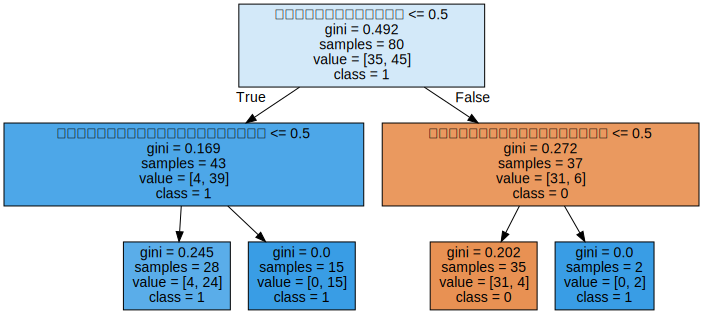

In [ ]:
filter_tree("聲因5 == 1 | 聲因6 == 1 | 聲因9 == 1", gsheet_super)

#### 5.1.6 聲請原因：年齡身體健康

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 1 | 聲因2 == 1 len = 66
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 1 1 1 1 1 1 1 1 0]
標準答案 [1 1 1 1 1 1 1 1 1 1 1 1 1 0]
績效 1.0
|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- class: 0



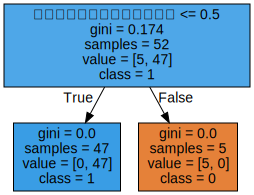

In [ ]:
filter_tree("聲因1 == 1 | 聲因2 == 1", gsheet_super)

#### 5.1.7 原監護人之意願


載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 原監護輔助人是否有意願續任 == 1 len = 77
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
標準答案 [0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0]
績效 0.875
|--- feature_2 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- class: 1



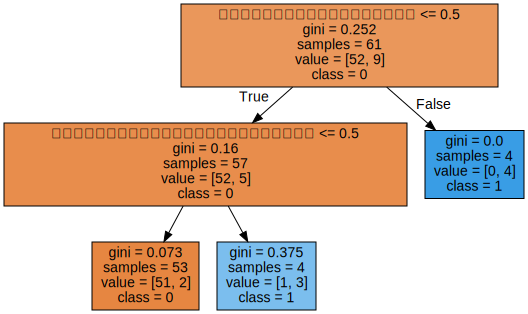

In [ ]:
filter_tree("原監護輔助人是否有意願續任 == 1", gsheet_super)

載入資料筆數：208
----------------------------------------------------------------------------------------------------
Filter 原監護輔助人是否有意願續任 == 0 len = 131
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
標準答案 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
績效 0.9259259259259259
|--- feature_7 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_6 <= 0.50
|   |   |--- class: 0
|   |--- feature_6 >  0.50
|   |   |--- class: 1



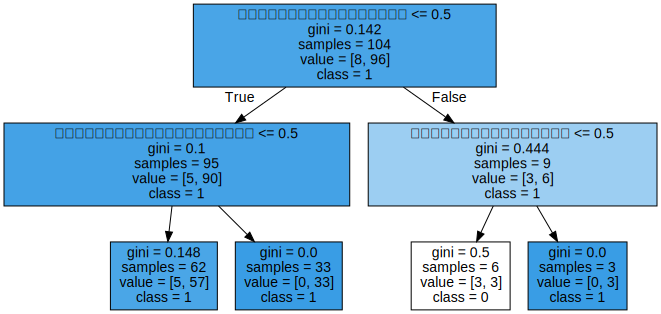

In [ ]:
filter_tree("原監護輔助人是否有意願續任 == 0", gsheet_super)

### 5.2 輔助宣告

#### 5.2.1 法院認定的改定因素

載入資料筆數：99
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1]
標準答案 [1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1]
績效 0.9
|--- feature_8 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- class: 1
|   |--- feature_11 >  0.50
|   |   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- class: 1



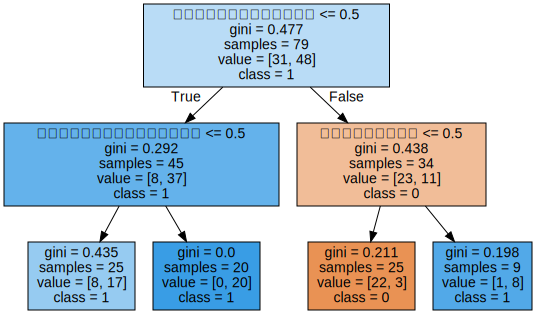

In [ ]:
dt_assist = DecisionTree(gsheet_id, gsheet_assist, auto_proc=True, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」'
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9'
])
for col in dt_assist.df.columns:
  dt_assist.replace_col_to(col, '', 0) # 替換 '' to -100 因為決策樹不支援 NaN
dt_assist.convert_to_numeric()
dt_assist.load(dt_assist.cols()[9:21], '原監護輔助人是否被法院改定', binary_y=True, max_depth=2)
dt_assist.text_representation()
dt_assist.graph()

#### 5.2.2 按聲請原因分類之法院認定的改定因素

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 1 len = 15
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 0]
標準答案 [0 1 1]
績效 0.3333333333333333
|--- feature_0 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- class: 1
|--- feature_0 >  0.50
|   |--- class: 1



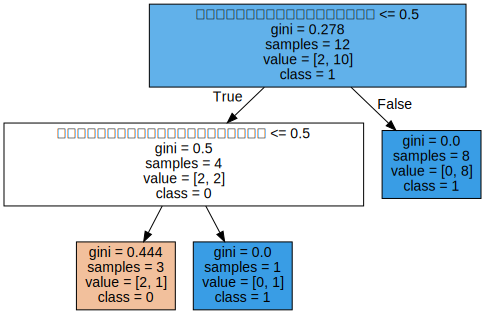

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因2 == 1 len = 17
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 0 1 0]
標準答案 [1 1 1 1]
績效 0.5
|--- feature_1 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 1
|--- feature_1 >  0.50
|   |--- class: 1



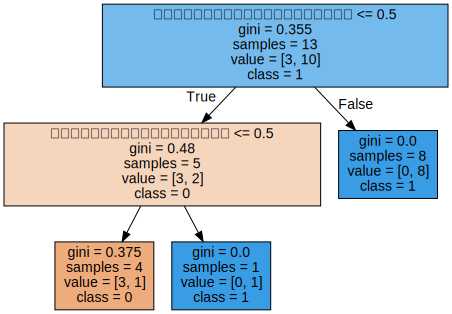

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因3 == 1 len = 21
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 1 0 1 0]
標準答案 [0 1 0 1 1]
績效 0.8
|--- feature_5 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 0
|   |--- feature_9 >  0.50
|   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 1
|   |--- feature_9 >  0.50
|   |   |--- class: 1



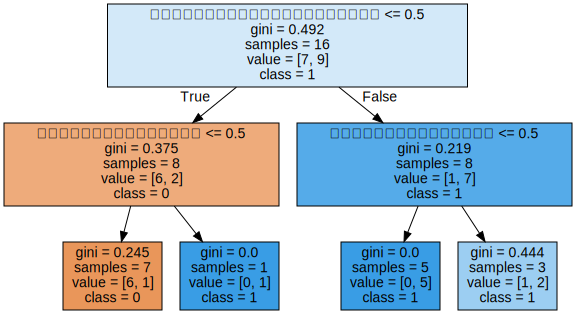

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因4 == 1 len = 12
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1]
標準答案 [1 1 1]
績效 1.0
|--- feature_4 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- class: 1
|--- feature_4 >  0.50
|   |--- class: 1



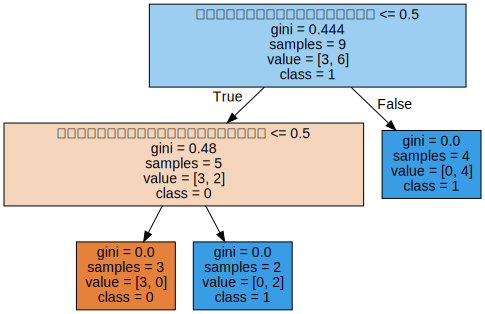

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因5 == 1 len = 22
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 1 1 1 1]
標準答案 [0 1 1 0 1]
績效 0.8
|--- feature_10 <= 0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 0
|   |--- feature_9 >  0.50
|   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- class: 1



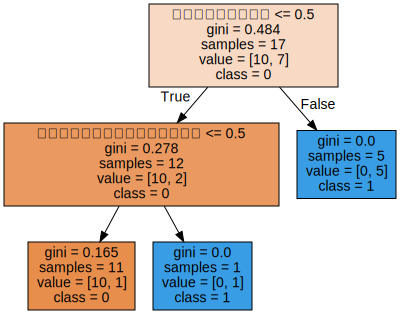

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因6 == 1 len = 28
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 1 1 0 0 1]
標準答案 [1 1 1 0 1 1]
績效 0.6666666666666666
|--- feature_10 <= 0.50
|   |--- feature_11 <= 0.50
|   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- feature_9 <= 0.50
|   |   |--- class: 1
|   |--- feature_9 >  0.50
|   |   |--- class: 1



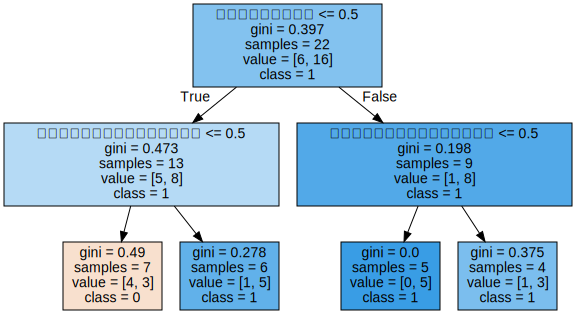

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因7 == 1 len = 16
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1]
標準答案 [1 1 1 1]
績效 1.0
|--- feature_7 <= 0.50
|   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_11 <= 0.50
|   |   |--- class: 0
|   |--- feature_11 >  0.50
|   |   |--- class: 1



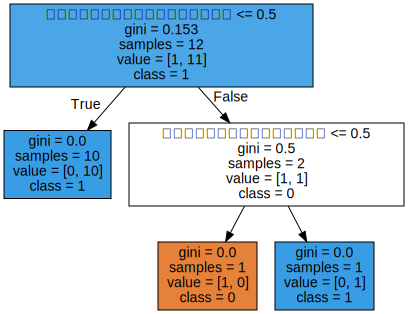

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因8 == 1 len = 54
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 0 1 1 0 1 0 1 1 0 1]
標準答案 [0 0 1 1 0 1 1 1 1 1 1]
績效 0.7272727272727273
|--- feature_11 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- class: 1
|--- feature_11 >  0.50
|   |--- class: 1



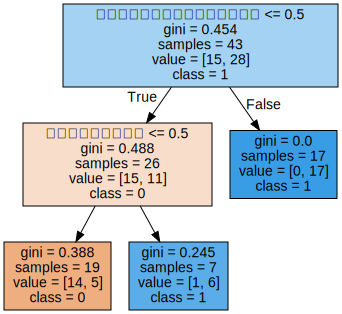

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因9 == 1 len = 13
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1]
標準答案 [1 0 1]
績效 0.6666666666666666
|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- class: 0



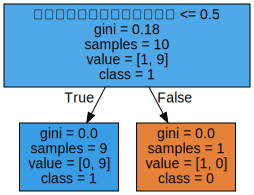

In [ ]:
for i in range(1, 10):
  filter_tree(f"聲因{str(i)} == 1", gsheet_assist)

#### 5.2.3 無聲請原因

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 0 & 聲因2 == 0 & 聲因3 == 0 & 聲因4 == 0 & 聲因5 == 0 & 聲因6 == 0 & 聲因7 == 0 & 聲因8 == 0 & 聲因9 == 0 len = 10
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [0 0]
標準答案 [0 0]
績效 1.0
|--- feature_6 <= 0.50
|   |--- class: 0
|--- feature_6 >  0.50
|   |--- feature_7 <= 0.50
|   |   |--- class: 0
|   |--- feature_7 >  0.50
|   |   |--- class: 0



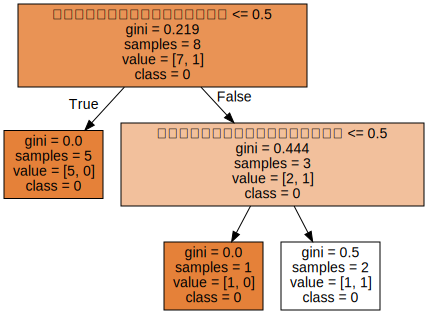

In [ ]:
filter_tree("聲因1 == 0 & 聲因2 == 0 & 聲因3 == 0 & 聲因4 == 0 & 聲因5 == 0 & 聲因6 == 0 & 聲因7 == 0 & 聲因8 == 0 & 聲因9 == 0", gsheet_assist)

#### 5.2.4 聲請原因：財產相關

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因3 == 1 | 聲因4 == 1 len = 28
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 0 1 1 0]
標準答案 [1 1 1 0 1 0]
績效 0.6666666666666666
|--- feature_5 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- class: 1



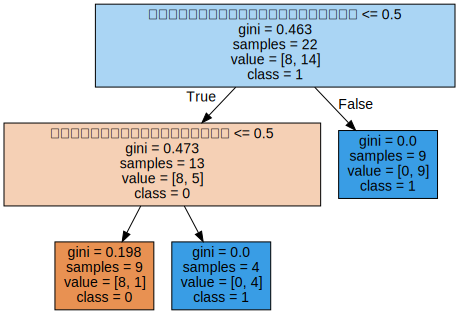

In [ ]:
filter_tree("聲因3 == 1 | 聲因4 == 1", gsheet_assist)

#### 5.2.5 聲請原因：非財產相關

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因5 == 1 | 聲因6 == 1 | 聲因9 == 1 len = 48
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 0 1 1 1 1 1 1 1 1]
標準答案 [1 0 0 0 0 1 1 1 1 0]
績效 0.6
|--- feature_7 <= 0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 1
|   |--- feature_10 >  0.50
|   |   |--- class: 1
|--- feature_7 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- class: 1



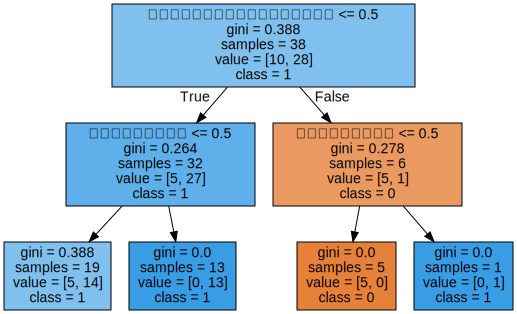

In [ ]:
filter_tree("聲因5 == 1 | 聲因6 == 1 | 聲因9 == 1", gsheet_assist)

#### 5.2.6 聲請原因：年齡身體健康

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 聲因1 == 1 | 聲因2 == 1 len = 22
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1]
標準答案 [0 1 1 1 0]
績效 0.6
|--- feature_8 <= 0.50
|   |--- class: 1
|--- feature_8 >  0.50
|   |--- feature_10 <= 0.50
|   |   |--- class: 0
|   |--- feature_10 >  0.50
|   |   |--- class: 1



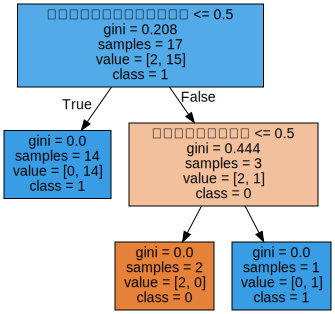

In [ ]:
filter_tree("聲因1 == 1 | 聲因2 == 1", gsheet_assist)

#### 5.2.7 原監護人之意願

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 原監護輔助人是否有意願續任 == 1 len = 40
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 0 1 0 1 1]
標準答案 [1 1 1 0 1 0 1 0]
績效 0.875
|--- feature_10 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- class: 0
|   |--- feature_5 >  0.50
|   |   |--- class: 1
|--- feature_10 >  0.50
|   |--- class: 1



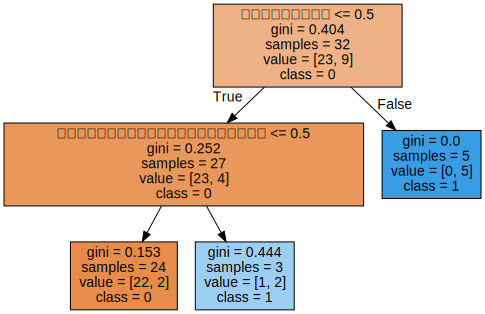

In [ ]:
filter_tree("原監護輔助人是否有意願續任 == 1", gsheet_assist)

載入資料筆數：99
----------------------------------------------------------------------------------------------------
Filter 原監護輔助人是否有意願續任 == 0 len = 59
----------------------------------------------------------------------------------------------------
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
預測 [1 1 1 1 1 1 1 1 1 1 1 1]
標準答案 [1 1 1 1 1 1 1 1 0 1 1 1]
績效 0.9166666666666666
|--- feature_11 <= 0.50
|   |--- feature_7 <= 0.50
|   |   |--- class: 1
|   |--- feature_7 >  0.50
|   |   |--- class: 0
|--- feature_11 >  0.50
|   |--- class: 1



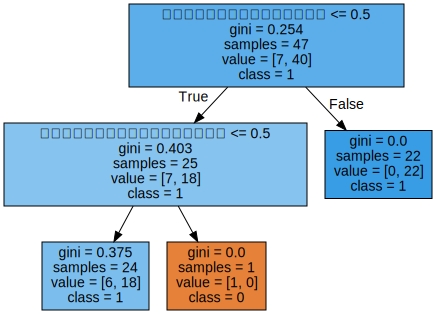

In [ ]:
filter_tree("原監護輔助人是否有意願續任 == 0", gsheet_assist)

## 迴歸

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn import preprocessing, linear_model
import statsmodels.api as sm


class MultipleRegression(Analysis):
  def load(self, columns_x, columns_y, binary_y=False):
    print('x', columns_x)
    print('y', columns_y)
    self.X = self.df[columns_x]
    self.y = self.df[columns_y]

    if binary_y:
      self.lm = linear_model.LogisticRegression() # 如果是二元y
    else:
      self.lm = LinearRegression() # 如果是數值y

    self.lm.fit(self.X, self.y)

    # 項目
    print('項目', self.X.columns)
    # 印出係數
    print('係數', self.lm.coef_)
    # 印出 p-value
    print('p-value', f_regression(self.X, self.y)[1])
    # 印出截距
    print('截距', self.lm.intercept_)

  def vars(self):
    # 模型績效
    mae = np.mean(abs(self.lm.predict(self.X) - self.y))
    mse = np.mean((self.lm.predict(self.X) - self.y) ** 2)
    r_squared = self.lm.score(self.X, self.y)
    adj_r_squared = r_squared - (1 - r_squared) * (self.X.shape[1] / (self.X.shape[0] - self.X.shape[1] - 1))

    # 印出模型績效
    print('mae:', mae, ' # 越小越好 單位就是y的單位')
    print('mse:', mse, '# 越小越好 單位就是y的單位')
    print('r2:', r_squared, '# 越大越好 模型適配程度 0.75以上好（可以畢業了） 0.5以上堪用（現實數據常常在這附近） 0.5以下（整個歪了')
    print('adj_r2:', adj_r_squared, '# 各係數標準化後的r2 越大越好 模型適配程度 0.75以上好（可以畢業了） 0.5以上堪用（現實數據常常在這')

  def predict(self, arr=[1, 1, 1, 1, 0, 0, 0, 0]):
    to_be_predicted = np.array([arr])
    predicted_sales = self.lm.predict(to_be_predicted)

    # 預測
    print('預測', predicted_sales)
  
  def logit(self, columns_x, columns_y):
    self.lx = self.df[columns_x]
    self.ly = self.df[columns_y]
    log_reg = sm.Logit(self.ly, self.lx).fit()
    print(log_reg.summary())
    OR=np.exp(log_reg.params)
    print("\n各變項odds ratio分別為：")
    print(OR)

### 6.1 監護宣告

In [ ]:
r = MultipleRegression(gsheet_id, gsheet_super, auto_proc=True, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9'
])
for col in r.df.columns:
  r.replace_col_to(col, '', 0.1)
r.convert_to_numeric()
r.load(r.cols()[0:12], '原監護輔助人是否被法院改定', binary_y=True)
r.vars()
r.predict([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print('='*100)
r.logit(r.cols()[0:12], '原監護輔助人是否被法院改定')

載入資料筆數：208
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
項目 Index(['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」',
       '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」',
       '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」',
       '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」'],
      dtype='object')
係數 [[ 1.11754845  0.85668862  1.79773357  1.38915312  1.0073952   1.20952621
   0.15767252 -1.09610755 -2.80452969  0.93341705  0.07292324  1.43454864]]
p-value [1.15039536e-07 8.05357400e-07 9.69664381e-03 8.41993532e-03
 8.43460188e-03 4.91735146e-04 2.49242574e-05 5.66975670e-22
 2.85191866e-44 9.69287404e-05 1.49216676e-01 1.49615434e-14]
截距 [0.46248104]
mae: 0.0625  # 越小越好 單位就是y的單位
mse: 0.0625 # 越小越好 單位就

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


### 6.2 監護宣告

In [ ]:
ra = MultipleRegression(gsheet_id, gsheet_assist, auto_proc=True, to_drop=[
  'index',
  'UUID',
  '宣告性質',
  '原監護輔助人之類型',
  '原監護輔助人之人數（自然人）',
  '主管機關是否被法院改定 (1=是, 2=否)',
  '法院是否考慮原監護輔助人之身體狀況',
  '法院是否於聲請原因外考量「其他改定因素」',
  '聲因1',
  '聲因2',
  '聲因3',
  '聲因4',
  '聲因5',
  '聲因6',
  '聲因7',
  '聲因8',
  '聲因9'
])
for col in ra.df.columns:
  ra.replace_col_to(col, '', 0.1) # 替換 '' to -100 因為決策樹不支援 NaN
ra.convert_to_numeric()
ra.load(ra.cols()[0:12], '原監護輔助人是否被法院改定', binary_y=True)
ra.vars()
ra.predict([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
print('='*100)
ra.logit(ra.cols()[0:12], '原監護輔助人是否被法院改定')

載入資料筆數：99
x ['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」', '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」', '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」', '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」']
y 原監護輔助人是否被法院改定
項目 Index(['法院是否認為原監護輔助人「年事已高」', '法院是否認為原監護輔助人「身體不堪負荷」', '法院是否認為原監護輔助人「盜領存款」',
       '法院是否認為原監護輔助人「不當處理本人之不動產」', '原監護輔助人是否與本人有「利害關係」',
       '法院是否認為原監護輔助人有「其他不當行為」', '監護輔助人是本人之「實際照顧者」', '監護輔助人是否為本人「廣義照顧者」',
       '原監護輔助人是否有意願續任', '專業人士訪視報告之「改定建議」', '本人之「改定建議」', '其他親屬、關係人之「改定建議」'],
      dtype='object')
係數 [[ 0.16703195  1.07129897  0.48909004  0.44924212  0.97917994  1.14834878
   0.07543658 -0.74795144 -1.65316792  0.86573327  1.44380545  1.39096684]]
p-value [1.38691927e-01 6.28691159e-03 1.03813078e-01 1.25295013e-01
 2.73586315e-02 8.51038279e-04 2.85186632e-02 1.25173558e-04
 5.58837218e-09 3.80007745e-03 2.66930066e-04 1.76399950e-06]
截距 [-0.17463798]
mae: 0.1111111111111111  # 越小越好 單位就是y的單位
mse: 0.111

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# 五 分析與結論


#### 因為XXX與OOO很有關，我們感覺如何如何。<br>學說上有「YYY」說，與「ZZZ」說，在實證的結果，數據顯示是ZZZ較為接近實際判決。<br>判斷其原因是、、、

#### 研究限制：1. 在編碼時，WWW種類樣本過少。 2.在實際判斷時，可能有前後不一的判斷、、、3. 應當納入MMM或NNN類型的。

#### 未來展望：如果還有明天、、、
